### Exercise 1

Recall that $ n! $ is read as “$ n $ factorial” and defined as
$ n! = n \times (n - 1) \times \cdots \times 2 \times 1 $

In Julia you can compute this value with `factorial(n)`

Write your own version of this function, called `factorial2`, using a `for` loop


<a id='jbe-ex2'></a>

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents

- number of successes in $ n $ binary trials  
- each trial succeeds with probability $ p $  


Using only `rand()` from the set of Julia’s built-in random number
generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `true` with probability $ p $


<a id='jbe-ex3'></a>

### Exercise 3

Compute an approximation to $ \pi $ using Monte Carlo

For random number generation use only `rand()`

Your hints are as follows:

- If $ U $ is a bivariate uniform random variable on the unit square $ (0, 1)^2 $, then the probability that $ U $ lies in a subset $ B $ of $ (0,1)^2 $ is equal to the area of $ B $  
- If $ U_1,\ldots,U_n $ are iid copies of $ U $, then, as $ n $ gets larger, the fraction that falls in $ B $ converges to the probability of landing in $ B $  
- For a circle, area = π * $ radius^2 $  



<a id='jbe-ex4'></a>

### Exercise 4

Write a program that prints one realization of the following random device:

- Flip an unbiased coin 10 times  
- If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
- If not, pay nothing  


Once again use only `rand()` as your random number generator


<a id='jbe-ex5'></a>

### Exercise 5

Simulate and plot the correlated time series

$$
x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 0
\quad \text{and} \quad t = 0,\ldots,n
$$

The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal

Set $ n = 200 $ and $ \alpha = 0.9 $


<a id='jbe-ex6'></a>

### Exercise 6

Plot three simulated time series, one for each of the cases $ \alpha = 0 $, $ \alpha = 0.8 $ and $ \alpha = 0.98 $

(The figure will illustrate how time series with the same one-step-ahead conditional volatilities, as these three processes have, can have very different unconditional volatilities)


<a id='jbe-ex7'></a>

### Exercise 7

This exercise is more challenging

Take a random walk, starting from $ x_0 = 1 $

$$
x_{t+1} = \, \alpha \, x_t + \sigma\, \epsilon_{t+1}
\quad \text{where} \quad
x_0 = 1
\quad \text{and} \quad t = 0,\ldots,t_{\max}
$$

- Furthermore, assume that the $ x_{t_{\max}} = 0 $  (i.e. at $ t_{\max} $, the value drops to zero, regardless of its current state)  
- The sequence of shocks $ \{\epsilon_t\} $ is assumed to be iid and standard normal  
- For a given path $ \{x_t\} $ define a **first-passage time** as $ T_a = \min\{t\, |\, x_t \leq a\} $, where by the assumption of the process $ T_a \leq t_{\max} $  


Start with $ \sigma = 0.2, \alpha = 1.0 $

1. calculate the first-passage time, $ T_0 $, for 100 simulated random walks – to a $ t_{\max} = 200 $ and plot a histogram  
1. plot the sample mean of $ T_0 $ from the simulation for $ \alpha \in \{0.8, 1.0, 1.2\} $  



<a id='jbe-ex8a'></a>

### Exercise 8(a)

This exercise is more challenging

The root of a univariate function $ f(\cdot) $ is an $ x $ such that $ f(x) = 0 $

One solution method to find local roots of smooth functions is called Newton’s method

Starting with an $ x_0 $ guess, a function $ f(\cdot) $ and the first-derivative $ f'(\cdot) $, the algorithm is to repeat

$$
x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}
$$

until $ | x^{n+1} - x^n| $ is below a tolerance

1. Use a variation of the `fixedpointmap` code to implement Newton’s method, where the function would accept arguments `f, f_prime, x_0, tolerance, maxiter`  
1. Test it with $ f(x) = (x-1)^3 $ and another function of your choice where you can analytically find the derivative  

### Exercise 8(b)

For those impatient to use more advanced features of Julia, implement a version of Exercise 8(a) where `f_prime` is calculated with auto-differentiation

In [1]:
using ForwardDiff

# operator to get the derivative of this function using AD
D(f) = x -> ForwardDiff.derivative(f, x)

# example usage: create a function and get the derivative
f(x) = x^2
f_prime = D(f)

f(0.1), f_prime(0.1)

ArgumentError: ArgumentError: Package ForwardDiff not found in current path:
- Run `import Pkg; Pkg.add("ForwardDiff")` to install the ForwardDiff package.


1. Using the `D(f)` operator definition above, implement a version of Newton’s method that does not require the user to provide an analytical derivative  
1. Test the sorts of `f` functions which can be automatically integrated by `ForwardDff.jl`  

In [3]:
#exercise1
function factorial2(n)
    result=1
    for i in 1:n
        result=result*i
    end
    return result
end
factorial2(3)
        
    

6

In [13]:
#exercise2
function binomial_rv(n,p)
    result=0
    for i in 1:n
        if (rand()<p)
            result+=1
        end
    end
    return result
end
binomial_rv(5,0.8)

4

In [17]:
#exercise3
function pi(N)
    n_inside=0
    for i in 1:N
        x=rand()*2-1
        y=rand()*2-1
        r=x*x+y*y
        if (r<=1)
            n_inside+=1
        end
    end
    return n_inside/N*4
end
@time pi(1000000000)

  4.117531 seconds (51.51 k allocations: 2.740 MiB, 0.16% gc time)


3.141597276

In [13]:
#exercise4
function rand_un(n)
a=rand(n)
for i in eachindex(a)
     if (a[i]>=0.5)
        a[i]=1
    else
        a[i]=0
    end
end
return a
end

function pay(n)
    dollar=0
    a=rand_un(n)
    for i in 2:n-1
        temp=a[i-1]*a[i]*a[i+1]
        if (temp==1)
            dollar=1
            break
        end
    end
    return dollar, a
end

pay(10)
            



(1, [1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0])

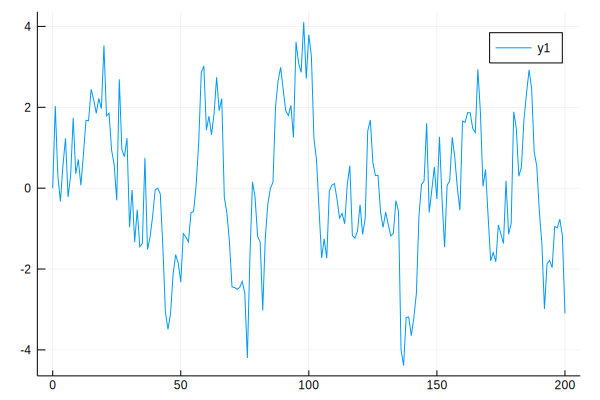

In [11]:
#exercise5
using Plots
function timeseries(t,a)
    x=zeros(t+1)
    for i in 2:t+1
        x[i]=a*x[i-1]+randn()
    end
    return Plots.plot(0:t,x)
end
timeseries(200,0.9)


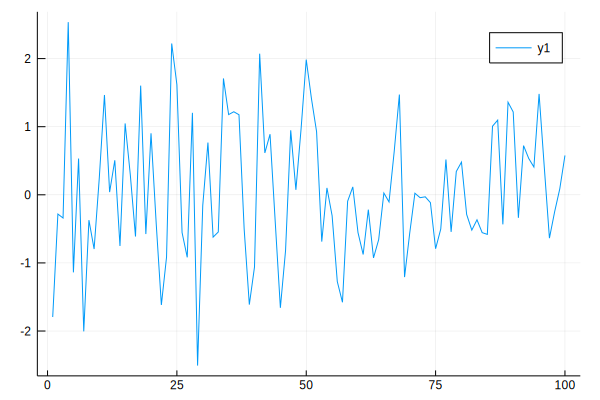

In [9]:
using Plots
n=100
ϵ=randn(n)
plot(ϵ)


In [25]:
using LinearAlgebra
function fixedpointmap(f, iv, tolerance, maxiter)
    # setup the algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter = iter + 1
    end
    return (x_old, normdiff, iter)
end

# define a map and parameters
p = 1.0
β = 0.9
f(v) = p + β * v # note that p and β are used in the function!

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # initial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x) - x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x) - x| = 9.181037796679448e-8 in 155 iterations


In [28]:
#exercise 8(a)
using LinearAlgebra
function f_prime(f,x)
    ϵ=1E-10
    return (f(x)-f(x-ϵ))/ϵ
end
function Newton(f, x_0, tolerance=1E-7, maxiter=1000)
    x_old = x_0
    normdiff = Inf
    iter = 1
    while normdiff>tolerance && iter<=maxiter
        x_new = x_old - f(x_old)/f_prime(f,x_old)
        normdiff = norm(x_new-x_old)
        x_old = x_new
        iter = iter+1
    end
    return (value=x_old,normdiff=normdiff,iter=iter)
end

x_0=0
f(x)=(x-1)^3
sol = Newton(f,x_0)
println("Root = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")
    

root = 0.9999998642431767, and |f(x) - x| = 6.782841954766639e-8 in 40 iterations


In [29]:
#exercise 8(a)
x_0=0
f(x)=(x^2-x-1)^3
sol = Newton(f,x_0)
println("Root = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")
    

Root = -0.6180338308887738, and |f(x) - x| = 7.8980560980213e-8 in 37 iterations
